In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from faker import Faker

In [2]:
fake = Faker()

In [3]:
num_customers = 1000 
num_products = 50   
num_interactions = 100000

In [4]:
interaction_types = ['purchased', 'viewed', 'clicked']

In [5]:
data = []

# Generate customer IDs from 1 to 1000 prefixed with 'CID'
customer_ids = [f'CID{str(i).zfill(4)}' for i in range(1, num_customers + 1)]

# Generate a pool of 4-digit product IDs starting with 'P'
product_ids = [f'P{random.randint(1000, 9999)}' for _ in range(num_products)]

In [6]:
# Generate synthetic data
for _ in range(num_interactions):
    customer_id = random.choice(customer_ids)
    product_id = random.choice(product_ids)
    interaction_type = random.choice(interaction_types)
    interaction_date = fake.date_this_year()

    data.append([customer_id, product_id, interaction_type, interaction_date])

In [7]:
product_df = pd.DataFrame(data, columns=['customer_id', 'product_id', 'interaction_type', 'interaction_date'])
product_df

,customer_id,product_id,interaction_type,interaction_date
0,CID0438,P6603,purchased,2024-09-12
1,CID0489,P4587,clicked,2024-07-26
2,CID0778,P3665,viewed,2024-06-19
3,CID0870,P2181,purchased,2024-02-17
4,CID0722,P3997,purchased,2024-08-17
...,...,...,...,...
99995,CID0207,P5728,purchased,2024-02-13
99996,CID0752,P5640,purchased,2024-05-03
99997,CID0801,P7893,clicked,2024-02-11
99998,CID0870,P9488,clicked,2024-04-03


In [8]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   customer_id       100000 non-null  object
 1   product_id        100000 non-null  object
 2   interaction_type  100000 non-null  object
 3   interaction_date  100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [9]:
product_df.isnull().sum()

customer_id         0
product_id          0
interaction_type    0
interaction_date    0
dtype: int64

<Axes: xlabel='interaction_type', ylabel='count'>

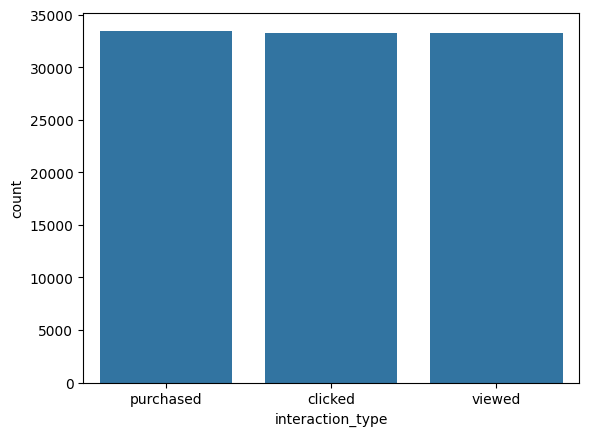

In [10]:
sns.countplot(data = product_df, x = product_df['interaction_type'])

In [11]:
product_df['product_id'].value_counts()

product_id
P5002    2115
P8741    2095
P8218    2082
P4531    2074
P1615    2071
P1284    2062
P9633    2060
P9854    2058
P6603    2047
P5069    2041
P2181    2035
P3665    2032
P1484    2030
P9068    2027
P6344    2026
P6422    2021
P9089    2021
P6493    2016
P5640    2015
P6608    2012
P1539    2009
P8191    2006
P5085    2005
P7308    2004
P8104    2002
P3696    2002
P3106    1999
P7629    1997
P7893    1996
P5728    1995
P9488    1995
P3576    1988
P5741    1987
P5672    1971
P7189    1971
P8282    1969
P1689    1966
P7513    1966
P6839    1964
P4587    1957
P6184    1957
P1112    1955
P9202    1954
P3997    1950
P4949    1946
P9813    1934
P1512    1923
P5994    1904
P9842    1898
P5669    1890
Name: count, dtype: int64

In [12]:
final_df = product_df.copy()

In [13]:
final_df.to_csv('product_data.csv')